In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB", "dardel","current_bgd2","population_unit", "distance", "supercomputer", "networks")

In [3]:
folder = "frequency"

In [4]:
parameters = {"start": 0.5, "end": 2.5}

In [5]:
e = Experiments()
e.add_experiment(name="0_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5")
e.add_experiment(name="0_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5")
e.add_experiment(name="45_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5") 
e.add_experiment(name="45_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-08_p1_p2.hdf5")  
e.add_experiment(name="90_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1.hdf5")

e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1_p2.hdf5")


In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-45-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/pop

In [7]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 3.72 s, sys: 409 ms, total: 4.13 s
Wall time: 28.2 s


In [8]:
colors = {"0_p1": "black",
         "45_p1": "green",
         "90_p1": "blue",
         "0_p1_p2": "black",
         "45_p1_p2": "green" ,
         "90_p1_p2": "blue"}
bins=10

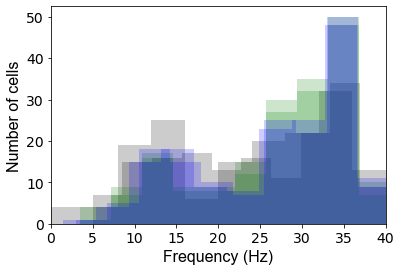

In [9]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

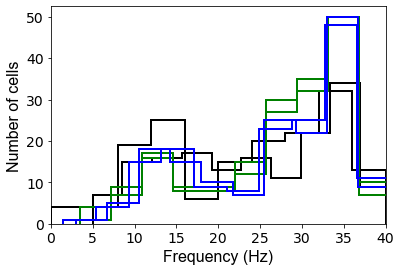

In [10]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [11]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

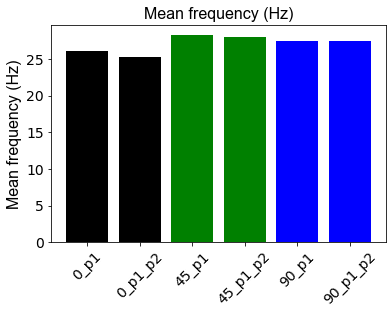

In [12]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [13]:
parameters = dict(pairs=list())
for distance in [0,45,90]:
    parameters["pairs"].append([f"{distance}_p1", f"{distance}_p1_p2", f"{distance}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [14]:
colors = {"0": "black",
         "45": "green" ,
         "90": "blue"}

In [15]:
customize={plt.ylim:(-1,0)}

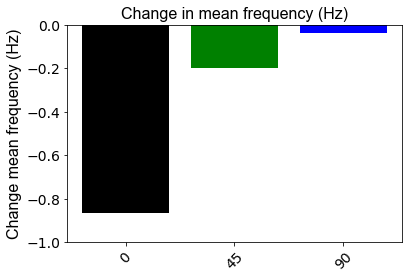

In [16]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["0", "45", "90"], save=True,customize=customize)

In [17]:
parameters = {"start": 0.5, "end": 2.5}

In [18]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 3.32 s, sys: 344 ms, total: 3.67 s
Wall time: 28.6 s


In [46]:
colors = {"0_p1": "black",
         "45_p1": "green",
         "90_p1": "blue",
         "0_p1_p2": "black",
         "45_p1_p2": "green" ,
         "90_p1_p2": "blue"}
bins=10

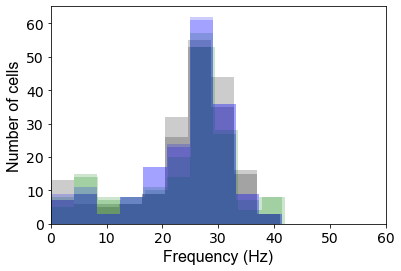

In [20]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

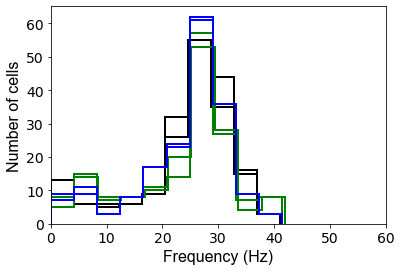

In [21]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

In [53]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

In [54]:
colors = {"0_p1": "black",
         "45_p1": "green",
         "90_p1": "blue",
         "0_p1_p2": "black",
         "45_p1_p2": "green" ,
         "90_p1_p2": "blue"}
bins=10

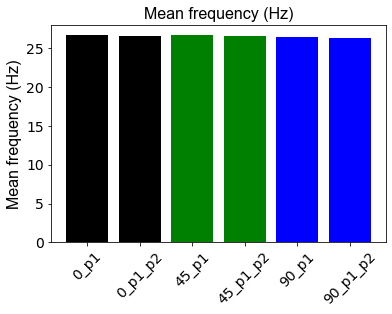

In [55]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [56]:
parameters = dict(pairs=list())
for distance in [0,45,90]:
    parameters["pairs"].append([f"{distance}_p1", f"{distance}_p1_p2", f"{distance}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [57]:
colors = {"0": "black",
         "45": "green" ,
         "90": "blue"}

In [58]:
customize={plt.ylim:(-1,0)}

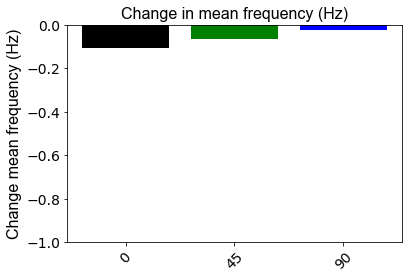

In [59]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["0", "45", "90"], save=True,customize=customize)